## Machine Learning Tutorial 4: Gradient Descent and Cost Function

In this tutorial, we will cover key concepts in machine learning, including the **cost function, gradient descent, learning rate**, and **mean squared error (MSE)**. Using a **home price prediction** example, we'll explain gradient descent. After exploring the theory behind these concepts, we'll implement gradient descent for linear regression in Python. The tutorial concludes with an exercise to apply what we've learned.  

### Predicting Home Prices Using Machine Learning

In machine learning, we use **training data** (observations) to derive a **prediction function** that can predict future values.

Example:
* **area** = [2600,3000,3200,3600,4000]
* **price** = [550k,565k,610k,680k,725k]

$$
\Large \text{price} = 135.78 \times \text{area} + 180616.43
$$

Pictorially, we begin with the following data points (red):

<img src="img/monroe-township.png" alt="Home Prices Raw" width="500"/>

And aim to find the best fit line (blue):

<img src="img/lin-reg-model.png" alt="Linear Regression" width="500"/>

### Finding the Best Fit Line

Creating a line that passes through the data points is easy, but how do we ensure it's the **best fit line**? To do so, we must **minimize the error** ( or **cost**). 
Understanding how to measure and minimize this error is crucial.

#### Topics covered:
* What is a Cost Function?
* How to Calculate the Prediction Function
* Mean Squared Error (MSE)
* Learning Rate
* Gradient Descent Algorithm
* Derivative vs. Partial Derivative
* Implementing Gradient Descent for Linear Regression in Python
* Exercise: Derive a linear function for given test results using gradient descent

## Mean Squared Error (MSE): A Popular Cost Function

**Mean Squared Error (MSE)** is a measure of the average squared difference between actual and predicted values. It's calculated as:

# $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$


Where:
- $ {n} $ is the number of observations,
- $ {y}_i $ is the actual value,
- $ \hat{y}_i $ is the predicted value.


<img src="img/MSE.png" alt="MSE" width="500"/>

To compute MSE, draw any line through the data, calculate the **difference (∆i)** between each actual datapoint and its corresponding predicted value on the line, square these differences, sum them, and divide by **n** to get the MSE.


# $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - y_{predicted})^2$

#### Substituting the linear equation $\text y_{predicted} = mx_i + b$:


# $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2$

Now that we understand how to calculate the error, the next step is to figure out how to find the **best fit line** in as few iterations as possible, minimizing the error.

## Gradient Descent Algorithm to Find the Best Fit Line

**Gradient descent** is an efficient way to find the best fit line by iteratively adjusting the slope (m) and intercept (b) to minimize the cost function. The algorithm continues to optimize these parameters until the cost is minimized, leading to the optimal line.

<img src="img/grad-descent.png" alt="MSE Formula" width="400"/>

<img src="img/optimal-m.png" alt="Optimal M" width="350" style="display: inline-block;"/>
<img src="img/optimal-b.png" alt="Optimal B" width="350" style="display: inline-block;"/>

### How Gradient Descent Works:

**1. Initialize**: Start with random values for **m** and **c** (marked by the star).

**2. Compute the Gradient**: Calculate the gradient of the loss function with respect to each parameter.

**3. Update Parameters**: Adjust **m** and **c** by moving in the opposite direction of the gradient, with the step size determined by the learning rate (α).

**4. Repeat**: Continue updating parameters until the algorithm converges to the minimum (marked by the red points).

### Gradient Descent with Fixed Learning Rate (LR):
* **Not recommended**: A fixed step size might cause the algorithm to miss the global cost minimum. 
<img src="img/Fixed_LR.png" alt="Fixed step size" width="400"/>


### Gradient Descent with Decreasing Learning Rate:

* **More accurate:** As we approach the minimum, the step size decreases, improving accuracy.
* Requires calculating the gradient at each step, using **partial derivatives.**

<img src="img/Decreasing_LR.png" alt="Decreasing step size" width="400"/>

# Partial Derivatives: $\frac{\partial }{\partial m}$ & $\frac{\partial }{\partial b}$

The **Mean Squared Error (MSE)** function is:

<h1 style="text-align: center;">$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))^2$</h1>

To minimize this function using gradient descent, we need the partial derivatives with respect to m (slope) and b (intercept).

### Partial Derivatives:

<h2 style="text-align: center;"> $\frac{\partial }{\partial m} = \frac{2}{n} \sum_{i=1}^{n} -x_i(y_i - (mx_i + b))$</h2>
<h2 style="text-align: center;"> $\frac{\partial }{\partial b} = \frac{2}{n} \sum_{i=1}^{n} -(y_i - (mx_i + b))$</h2>

These partial derivatives guide how to update the parameters m and b in each step of the gradient descent process to reduce the error.

## Updating parameters

To minimize the error using gradient descent, the parameters m and b are updated as follows:

<h1 style="text-align: center;">$\text{m = m - learning rate * }\frac{\partial }{\partial m}$</h1>

<h1 style="text-align: center;">$\text{b = b - learning rate *}\frac{\partial }{\partial b}$</h1>

These updates adjust the slope m and intercept b by moving in the direction that reduces the error, based on the learning rate and the partial derivatives.

<img src="img/visualize-step-size.png" alt="Calculate Step Size" width="500"/>

## Task
Given the observations:

* **x = [1, 2, 3, 4, 5]**
* **y = [5, 7, 9, 11, 13]**

We will derive the best fit line with optimal values for **m** (slope) and **b** (intercept) using gradient descent.

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

We will use `numpy.array` instead of a standard Python list because **NumPy** allows for more efficient matrix operations and performs faster than regular Python lists, especially for numerical computations like matrix multiplication.

In [ ]:
def gradient_descent(x,y):
    m = b = 0
    iterations = 3000
    n = len(x)
    learning_rate = 0.08
    
    for i in range(iterations):
        y_predicted = m * x + b
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        
        grad_m = -(2/n)*sum(x*(y-y_predicted))
        grad_b = -(2/n)*sum(y-y_predicted)
        
        m = m - learning_rate * grad_m
        b = b - learning_rate * grad_b
        
        
        print(f"m {m}, b {b}, cost {cost}, iteration {i}")

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

In [41]:
def gradient_descent(x,y):
    # Set initial values of gradient and y-intercept
    m = b = 0
    
    # Set number of iterations to update above values
    iterations = 3000
    
    # Number of data points
    n = len(x)
    
    # Step size; Higher means Faster, but might miss global minima 
    learning_rate = 0.08
    
    for i in range(iterations):
        # Get current predictions
        y_predicted = m * x + b
        
        # Calculate the cost function (MSE)
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        
        # Partial derivatives (wrt `m` and `b`)
        grad_m = -(2/n)*sum(x*(y-y_predicted))
        grad_b = -(2/n)*sum(y-y_predicted)
        
        # Update values of gradient and y-intercept
        m = m - learning_rate * grad_m
        b = b - learning_rate * grad_b
        
        # Display values of `m`, `b`, cost, and iteration number
        print(f"m {m}, b {b}, cost {cost}, iteration {i}")

x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)

m 4.96, b 1.44, cost 89.0, iteration 0
m 0.4991999999999983, b 0.26879999999999993, cost 71.10560000000002, iteration 1
m 4.451584000000002, b 1.426176000000001, cost 56.8297702400001, iteration 2
m 0.892231679999997, b 0.5012275199999995, cost 45.43965675929613, iteration 3
m 4.041314713600002, b 1.432759910400001, cost 36.35088701894832, iteration 4
m 1.2008760606719973, b 0.7036872622079998, cost 29.097483330142282, iteration 5
m 3.7095643080294423, b 1.4546767911321612, cost 23.307872849944438, iteration 6
m 1.4424862661541864, b 0.881337636696883, cost 18.685758762535738, iteration 7
m 3.4406683721083144, b 1.4879302070713722, cost 14.994867596913156, iteration 8
m 1.6308855378034224, b 1.0383405553279617, cost 12.046787238456794, iteration 9
m 3.2221235247119777, b 1.5293810083298451, cost 9.691269350698109, iteration 10
m 1.7770832372205707, b 1.1780607551353204, cost 7.8084968312098315, iteration 11
m 3.0439475772474127, b 1.5765710804477953, cost 6.302918117062937, iteration 1

After each iteration, the **cost** shoudl decrease, and eventually, the values of **m** and **b** will converge to an optimal set of values.

## Hyperparameter Tuning

It's generally recommended to start with a relatively low number of **iterations** and experiment with different **learning rates** to find the optimal value.

***Note: You want the largest step size (learning rate) that ensures convergence.***

### After Convergence

There are several ways to determine convergence:
* Set a **threshold** for the cost.
* Compare the cost between consecutive iterations using **floating-point comparisons**.

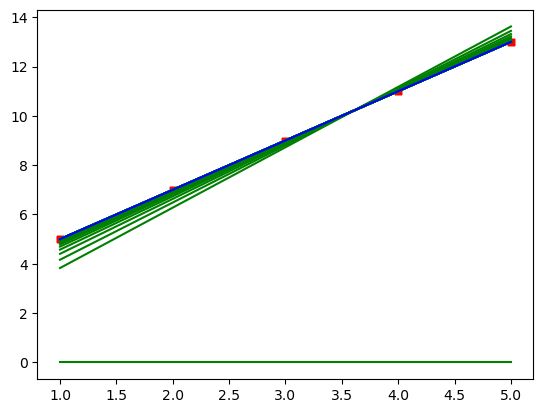

In [42]:
def gradient_descent(x, y):
    m = b = 0
    rate = 0.01
    n = len(x)
    
    # Plot the original data points on a scatter plot
    plt.scatter(x, y, color='red', marker='+', linewidth=5)
    
    for i in range(3000):
        y_predicted = m * x + b
        
        if i % 100 == 0:  # Plot every 100 iterations
            plt.plot(x, y_predicted, color='green')
        
        md = -(2/n) * sum(x * (y - y_predicted))
        yd = -(2/n) * sum(y - y_predicted)
        m = m - rate * md
        b = b - rate * yd
    
    # Plot the final line after the loop
    plt.plot(x, y_predicted, color='blue')
    plt.show()

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x, y)

## Exercise

Using the provided `test_scores.csv` dataset, find the correlation between the `math` scores (independent variable) and `cs` scores (dependent variable).

### Task:
1. Apply the **gradient descent algorithm** to determine the optimal values for **m** (slope) and **b** (intercept).
    * Compate the cost at each iteration.
    * Terminate the algorithm once the cost reaches a specified threshold (Hint: you can use the `math.isclose()` function for comparison).


 
2. Use `sklearn.linear_model` to find the coefficient **(m)** and intercept **(b)**.
    * Compare these values with the ones generated by your gradient descent algorithm.

In [43]:
df_scores = pd.read_csv("C:\\Users\\Vaishob\\PycharmProjects\\machine-learning\\test_scores.csv")
df_scores

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [44]:
# Extract the 'math' and 'cs' columns
math_scores = df_scores['math']
cs_scores = df_scores['cs']

In [45]:
# Calculate the correlation between math and cs scores
# correlation, _ = pearsonr(math_scores, cs_scores)
# print("Correlation between math and cs scores:", correlation)

In [46]:
# Gradient Descent algorithm
def gradient_descent(x, y, learning_rate=0.0002, num_iterations=1000000, threshold=1e-6):
    m, b = 0, 0
    n = len(x)
    
    for i in range(num_iterations):
        y_pred = m * x + b
        cost = (1/n) * sum((y_pred - y)**2)
        
        # Calculate gradients
        grad_m = -(2/n) * sum(x * (y - y_pred))
        grad_b = -(2/n) * sum(y - y_pred)
        
        # Update parameters
        m -= learning_rate * grad_m
        b -= learning_rate * grad_b
        
        # Check for convergence
        if np.isclose(cost, 0, atol=threshold):
            break
    
    return m, b

m_gd, b_gd = gradient_descent(math_scores, cs_scores)
print("Gradient Descent results - Slope (m):", m_gd, "Intercept (b):", b_gd)

# Reshape the data for sklearn
X = math_scores.values.reshape(-1, 1)
y = cs_scores.values

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient (slope) and intercept
m_sklearn = model.coef_[0]
b_sklearn = model.intercept_
print("sklearn results - Slope (m):", m_sklearn, "Intercept (b):", b_sklearn)

Gradient Descent results - Slope (m): 1.0177362378598027 Intercept (b): 1.9152193109535014
sklearn results - Slope (m): 1.0177362378569326 Intercept (b): 1.9152193111569176
